In [1]:
import os, sys
sys.path.append(os.chdir(os.getcwd()+"/.."))

import numpy as np
import matplotlib.pyplot as plt
from src.potential1D import harmonicOsc1D

%matplotlib inline

# Simple Potentials

## Harmonic Oscillartor

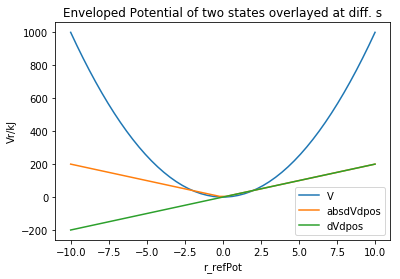

In [2]:
##Build Potential
pot = harmonicOsc1D(x_shift=0, fc=20)

##Params
positions = np.linspace(-10,10)
energies = pot.ene(positions)
dVdpos = pot.dhdpos(positions)

##EXAMPLE PLOT
plt.plot(positions, energies, label="V")
plt.plot(positions, list(map(abs, dVdpos)), label="absdVdpos")
plt.plot(positions, dVdpos, label="dVdpos")
plt.ylabel("Vr/kJ")
plt.xlabel("r_refPot")
plt.title("Enveloped Potential of two states overlayed at diff. s")
plt.legend()
plt.show()

# Flatwell

(-100, 100)

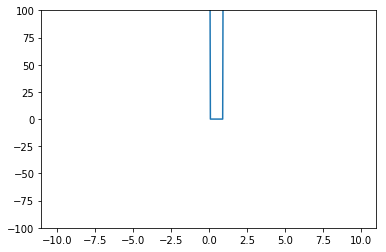

In [17]:
from src.potential1D import flat_well

fw = flat_well()
positions=np.linspace(-10,10,100)
energies = fw.ene(positions)

plt.plot(positions, energies)
plt.ylim((-100,100))

# Lennard Jones


(-100, 100)

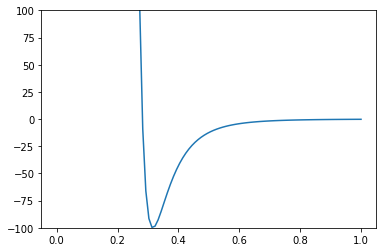

In [14]:
from src.potential1D import lennardJonesPotential

lj=lennardJonesPotential(c6=0.2,c12=0.0001, x_shift=-1)
positions=np.linspace(0.0000001,1,100)
energies = lj.ene(positions)

plt.plot(positions, energies)
plt.ylim((-100,100))

# Perturbed Potentials

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
#import src.conveyorBelt  as cvb
import src.system as system1D 
from src.potential1D import pertHarmonicOsc1D, linCoupledHosc, expCoupledHosc



In [6]:
pot_stretch = pertHarmonicOsc1D()
pot_lin_strech = linCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0))
pot_exp_strech = expCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0), s=0.025, temp=300.0)

In [42]:
x=np.linspace(-10, 10, 100)
lam=np.linspace(0,1,100)

energy_map_lin = []
energy_map_exp = []

for y in lam:
    pot_lin_strech.set_lam(y)
    pot_exp_strech.set_lam(y)

    energy_map_lin.append(pot_lin_strech.ene(x))
    energy_map_exp.append( pot_lin_strech.ene(x))
    
energy_map_lin = np.array(energy_map_lin)
energy_map_exp = np.array(energy_map_exp)


Text(0.5, 1.0, 'Exponential')

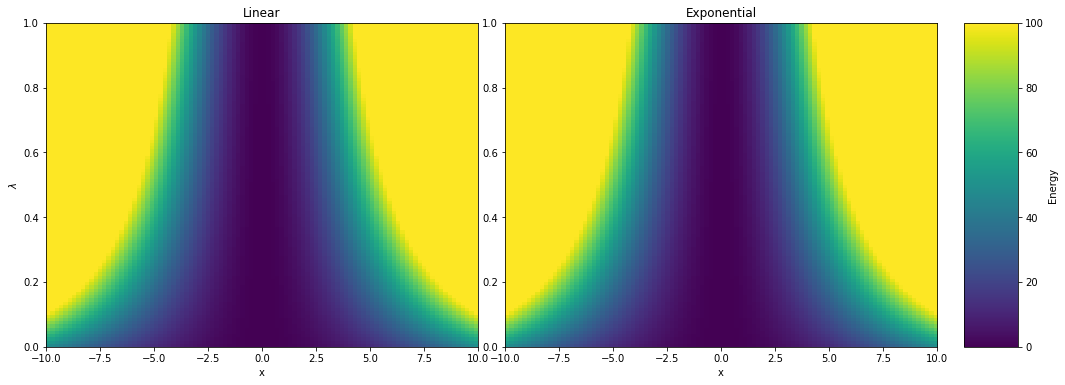

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0.05, 0.05, 0.4, 0.9])
ax2 = fig.add_axes([0.475, 0.05, 0.4, 0.9])
ax3 = fig.add_axes([0.9, 0.05, 0.05, 0.9])          


surf = ax1.imshow(energy_map_lin, cmap="viridis", interpolation="nearest",
                 origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0, aspect="auto")
surf = ax2.imshow(energy_map_exp, cmap="viridis", interpolation="nearest",
                 origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0, aspect="auto")
colorbar.Colorbar(ax3, surf, label='Energy')
for a in [ax1, ax2]:
    a.set_xlim(-10,10)
    a.set_ylim(0, 1)
    a.set_xlabel('x')
ax1.set_ylabel('$\lambda$')
ax1.set_title('Linear')
ax2.set_title('Exponential')


Text(0.5, 0, '$r$')

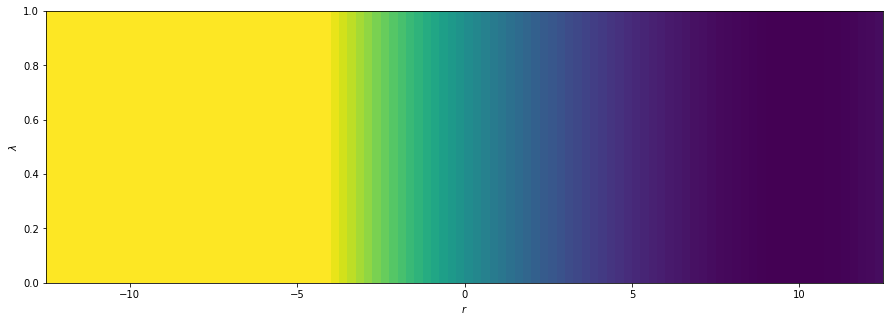

In [20]:
pot_x_shift=pertHarmonicOsc1D(fc=1.0, alpha=0.0, gamma=10.0)
x=np.linspace(-12.5, 12.5, 100)
lam=np.linspace(0,1,100)
#xx, ll = np.meshgrid(x, lam)

energy_map_pot_x_shift = []
for lamb in lam:
    pot_x_shift.set_lam(lamb)
    row = pot_x_shift.ene(list(x))
    energy_map_pot_x_shift.append(row)              
energy_map_pot_x_shift = np.array(energy_map_pot_x_shift)

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
surf = ax.imshow(energy_map_pot_x_shift, cmap="viridis", interpolation="nearest",
             origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0, aspect="auto" )
ax.set_ylabel("$\lambda$")
ax.set_xlabel("$r$")

In [21]:
pot_lin_x_shift=linCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=3.0, x_shift=10.0))
pot_exp_x_shift=expCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=3.0, x_shift=10.0), s=0.05, temp=300.0)

Text(0.5, 1.0, 'Exponential')

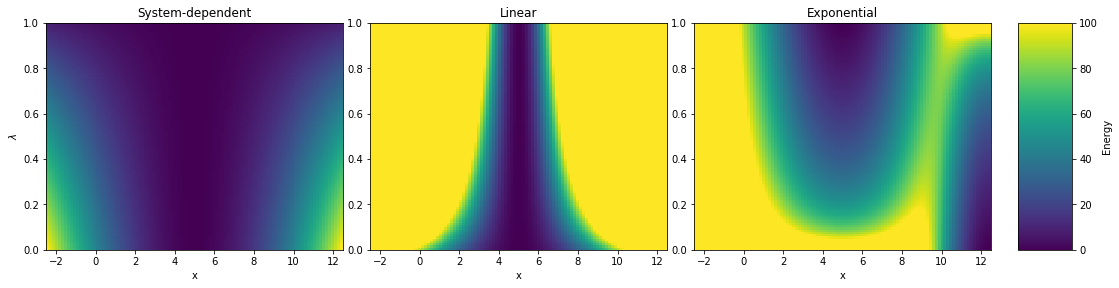

In [22]:
fig = plt.figure(figsize=(15,3.5))
ax1 = fig.add_axes([0.05, 0.05, 0.275, 0.9])
ax2 = fig.add_axes([0.35, 0.05, 0.275, 0.9])
ax3 = fig.add_axes([0.65, 0.05, 0.275, 0.9])
ax4 = fig.add_axes([0.95, 0.05, 0.05, 0.9])

x=np.linspace(-10, 10, 100)
lam=np.linspace(0,1,100)

energy_map_lin = []
energy_map_exp = []
energy_map_exp_x_shift = []
for y in lam:
    pot_lin_strech.set_lam(y)
    pot_exp_strech.set_lam(y)
    pot_exp_x_shift.set_lam(y)
    
    energy_map_lin.append(pot_lin_strech.ene(x))
    energy_map_exp.append( pot_lin_strech.ene(x))
    energy_map_exp_x_shift.append(pot_exp_x_shift.ene(x))
energy_map_lin = np.array(energy_map_lin)
energy_map_exp = np.array(energy_map_exp)
energy_map_exp_x_shift = np.array(energy_map_exp_x_shift)


#ax = fig.gca(projection='3d')
ax1.imshow(energy_map_lin, extent=(-2.5, 12.5, 0, 1), aspect='auto')#scatter(xx, ll, c=pot_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
ax2.imshow(energy_map_exp, origin='lower', extent=(-2.5, 12.5, 0, 1), aspect='auto', vmax=25)#scatter(xx, ll, c=pot_lin_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
ax3.imshow(energy_map_exp_x_shift, origin='lower', extent=(-2.5, 12.5, 0, 1), aspect='auto', vmax=25)#scatter(xx, ll, c=pot_lin_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')

colorbar.Colorbar(ax4, surf, label='Energy')
for a in [ax1, ax2, ax3]:
    a.set_xlim(-2.5,12.5)
    a.set_ylim(0, 1)
    a.set_xlabel('x')
ax1.set_ylabel('$\lambda$')
ax1.set_title('System-dependent')
ax2.set_title('Linear')

ax3.set_title('Exponential')